In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1500)
pd.set_option('display.max_columns',1500)

data=pd.read_csv('C:\\Users\\User\\OneDrive\\Data Scientist\\Speech Recognition\\FE_male_female.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         159 non-null    float64
 1   spectral_centroid   159 non-null    float64
 2   spectral_bandwidth  159 non-null    float64
 3   spectral_rolloff    159 non-null    float64
 4   zero_crossing_rate  159 non-null    float64
 5   rms                 159 non-null    float64
 6   tempogram           159 non-null    float64
 7   class               159 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 10.1 KB


                    chroma_stft  spectral_centroid  spectral_bandwidth  \
chroma_stft            1.000000          -0.002282            0.027445   
spectral_centroid     -0.002282           1.000000            0.937113   
spectral_bandwidth     0.027445           0.937113            1.000000   
spectral_rolloff       0.053123           0.985244            0.947276   
zero_crossing_rate    -0.028830           0.909932            0.756625   
rms                   -0.169226          -0.333792           -0.437194   
tempogram              0.194132          -0.183236           -0.054999   
class                 -0.098410           0.060261            0.044197   

                    spectral_rolloff  zero_crossing_rate       rms  tempogram  \
chroma_stft                 0.053123           -0.028830 -0.169226   0.194132   
spectral_centroid           0.985244            0.909932 -0.333792  -0.183236   
spectral_bandwidth          0.947276            0.756625 -0.437194  -0.054999   
spectral_

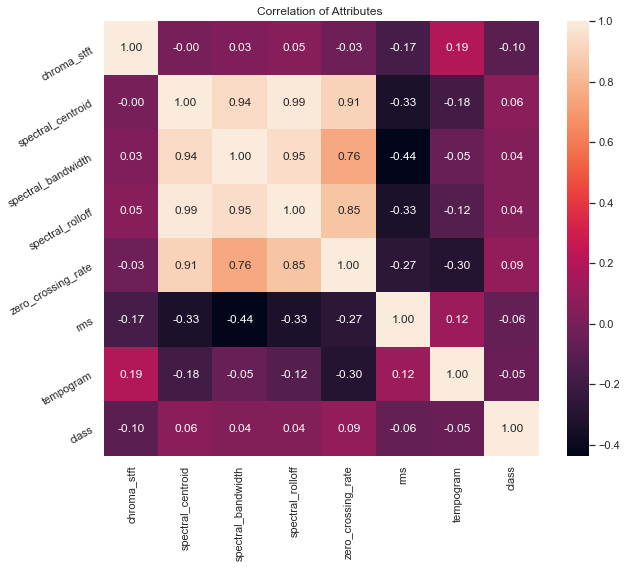

In [72]:
correlation =data.corr()
print(correlation)
correlation['class'].sort_values(ascending=False)

#Visualize correlation using heat meap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes ')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split,KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style = 'white', context='notebook',palette='deep')

In [8]:
#split out test and train

x = data.drop('class',axis =1)
y= data['class']
print('Split Data: X')
print(x)
print('Split Data: Y')
print(y)

testsize=0.2
seed =7
num_folds =10
scoring = 'accuracy'

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=testsize,random_state=seed)

Split Data: X
     chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0       0.360843         937.945697          916.417332       1567.252679   
1       0.389116        1230.355141         1490.254118       2368.383768   
2       0.285539        1600.906252         1525.717374       2753.401848   
3       0.375648        1671.010594         1638.309507       3179.298913   
4       0.350145        2364.166554         1914.867329       4114.693265   
5       0.345971        1104.823600         1307.701642       1995.771912   
6       0.321143        1371.493203         1393.724953       2505.253802   
7       0.335741        1545.328849         1877.737095       2663.228162   
8       0.315777        1358.614093         1410.913969       2465.111747   
9       0.338812        2121.225878         1682.224661       3776.748344   
10      0.410397        1434.339793         1522.593273       2686.404996   
11      0.298804        1358.736812         1249.589633       

NameError: name 'train_test_split' is not defined

<Figure size 432x288 with 0 Axes>

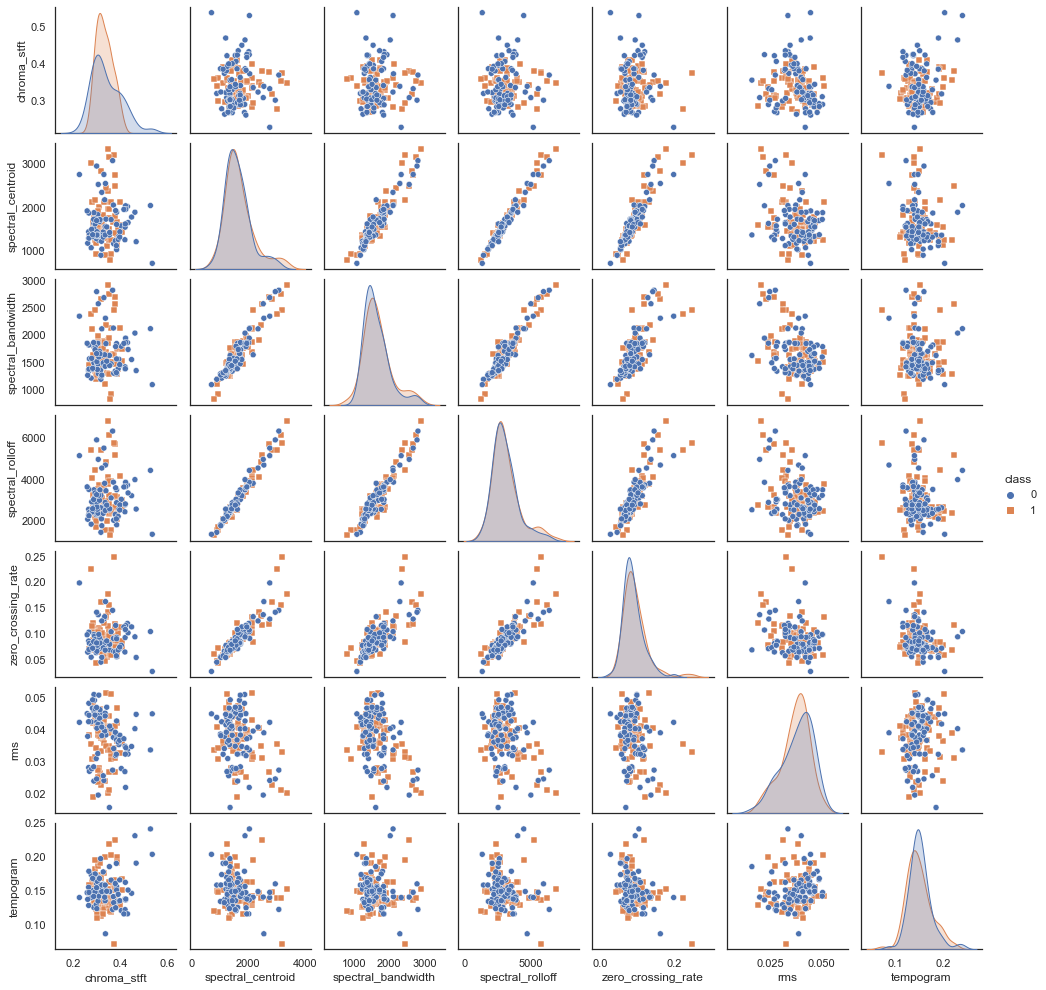

In [75]:
#scatter plot
plt.figure()
sns.pairplot(data, hue = "class", height=2, markers=["o", "s",])
plt.show()



In [3]:
corrMatrix = data.corr()
print (corrMatrix)

                    chroma_stft  spectral_centroid  spectral_bandwidth  \
chroma_stft            1.000000          -0.002282            0.027445   
spectral_centroid     -0.002282           1.000000            0.937113   
spectral_bandwidth     0.027445           0.937113            1.000000   
spectral_rolloff       0.053123           0.985244            0.947276   
zero_crossing_rate    -0.028830           0.909932            0.756625   
rms                   -0.169226          -0.333792           -0.437194   
tempogram              0.194132          -0.183236           -0.054999   
class                 -0.098410           0.060261            0.044197   

                    spectral_rolloff  zero_crossing_rate       rms  tempogram  \
chroma_stft                 0.053123           -0.028830 -0.169226   0.194132   
spectral_centroid           0.985244            0.909932 -0.333792  -0.183236   
spectral_bandwidth          0.947276            0.756625 -0.437194  -0.054999   
spectral_

In [32]:
#parametric for random forest
num_trees = 100
max_features=3

In [33]:
#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Dec.Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))

In [78]:
#evluate each model
results = []
names= []
for name, model in models:
    kfold= KFold(n_splits=10, random_state = None)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.520513 (0.172144)
LDA: 0.498077 (0.167847)
KNN: 0.449359 (0.110377)
Dec.Tree: 0.466667 (0.129220)
NB: 0.582692 (0.097489)
RF: 0.521154 (0.174662)
SVM: 0.401282 (0.131033)


In [23]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=testsize,random_state=seed)
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
y_prediction

array([0.66579709, 0.42465921, 0.44851471, 0.69857611, 0.44584235,
       0.49663316, 0.61843554, 0.57650928, 0.38142651, 0.46313124,
       0.67108043, 0.56531155, 0.36628636, 0.54611617, 0.66584968,
       0.53791334, 0.44802163, 0.46286286, 0.12735086, 0.42331697,
       0.46062151, 0.51692256, 0.31034244, 0.53764938, 0.49387388,
       0.49499096, 0.90583085, 0.36919055, 0.49041423, 0.52853392,
       0.43209659, 0.45267838])

In [28]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
import numpy as np
score=r2_score(y_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is ==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is ==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is -0.19333903375247208
mean_sqrd_error is == 0.2971693882879691
root_mean_squared error of is == 0.5451324502246854


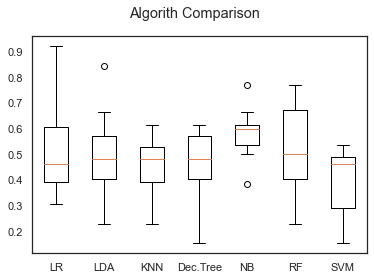

In [79]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
#Fit the LDA model
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
LDA_pred=LDA.predict(x_test)
LDA.explained_variance_ratio_

array([1.])

In [81]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(LDA_pred), labels=[0, 1]).ravel()
 
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 5
True Negative 9
False Positive 8
False Negative 10


In [82]:
#confusion matrix visualization 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test, LDA_pred)
print(classification_report(y_test, LDA_pred))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50        17
           1       0.38      0.33      0.36        15

    accuracy                           0.44        32
   macro avg       0.43      0.43      0.43        32
weighted avg       0.43      0.44      0.43        32



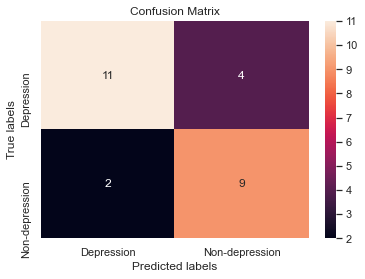

In [67]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Depression', 'Non-depression']); 
ax.yaxis.set_ticklabels(['Depression', 'Non-depression']);

In [87]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model1 = GaussianNB()

# Train the model using the training sets
model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [88]:
cm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.45      0.33      0.38        15

    accuracy                           0.50        32
   macro avg       0.49      0.49      0.48        32
weighted avg       0.49      0.50      0.49        32



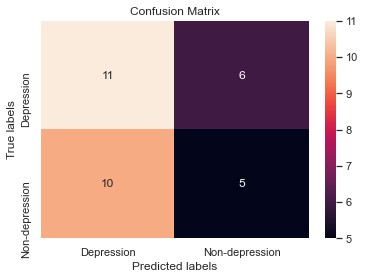

In [89]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Depression', 'Non-depression']); 
ax.yaxis.set_ticklabels(['Depression', 'Non-depression']);